## 3. Applications of DFTs
**The following are exercises from Chapter 7 of Mark Newman's Computational Physics book.**

3.1 Read in the `sunspots.txt` data as a 2D array. There are two columns of numbers (separated by tabs). The first column is the number of the recorded month. The second is the number of sunspots recorded in that month. Plot this data.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

### Sunspot Data Analysis 

In [21]:
# 3.1 SOLUTION
with open("data/sunspots.txt", "r") as F:
    data = np.asanyarray([[float(i) for i in j.split('\t')] for j in F])

<IPython.core.display.Javascript object>


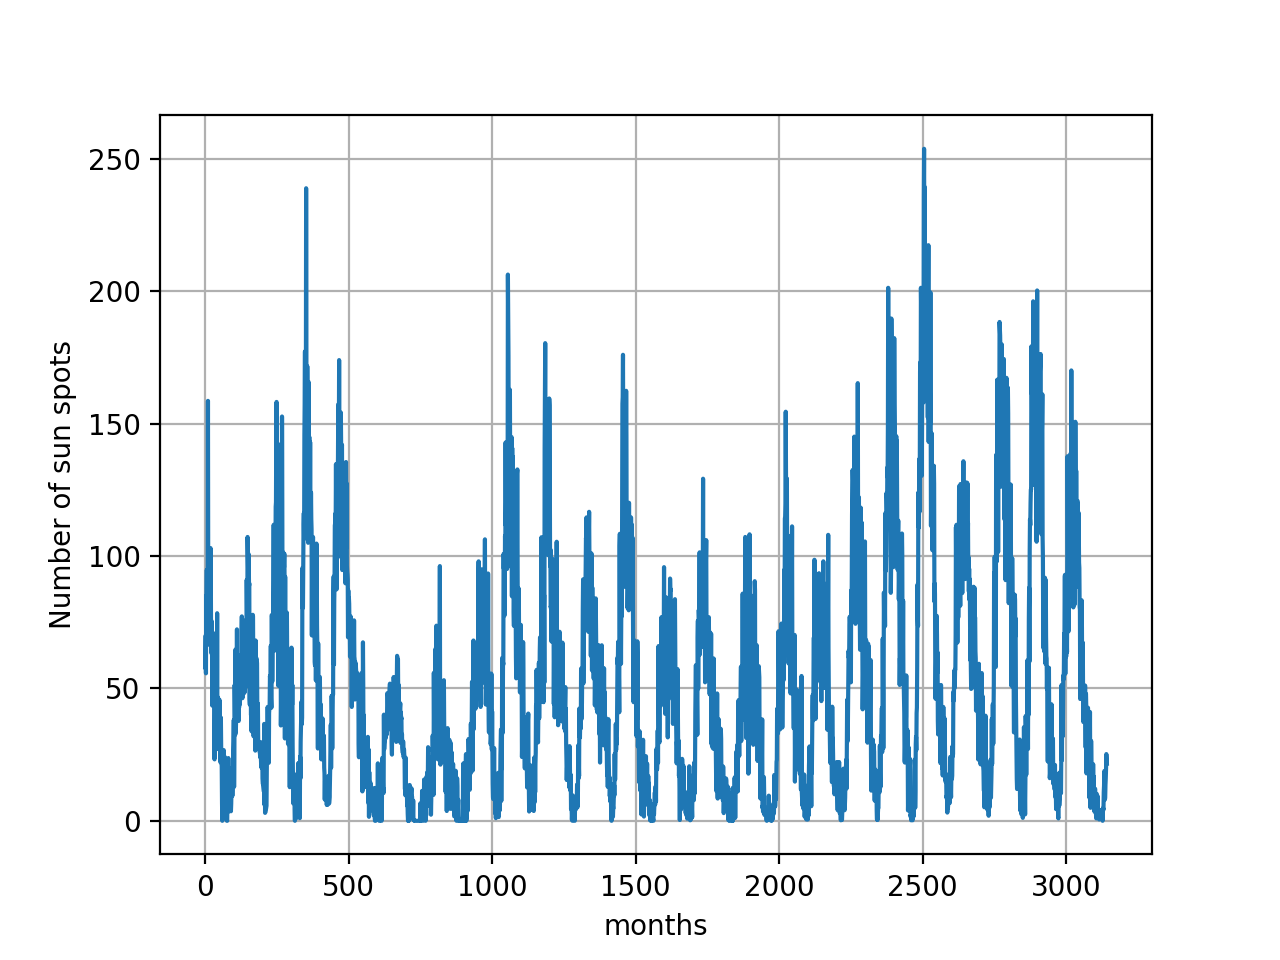

In [22]:
x = data[:, 0]
y = data[:, 1]
fig,ax = plt.subplots()
# ax.set_xlim(0,500)
ax.plot(x,y)
ax.grid()
ax.set_xlabel("months")
ax.set_ylabel("Number of sun spots")

Estimate the frequency of the slowly-oscillating patten in the data, which separates the major peaks. 
> Solution: A peak occurs roughly every 100 months. Thus the frequency is approximately 0.01 [1/months]

3.2 Take a DFT of this real-valued data and consult the power spectrum $|c_{k}|^{2}$ to evaluate the periodicity of the data.

<IPython.core.display.Javascript object>


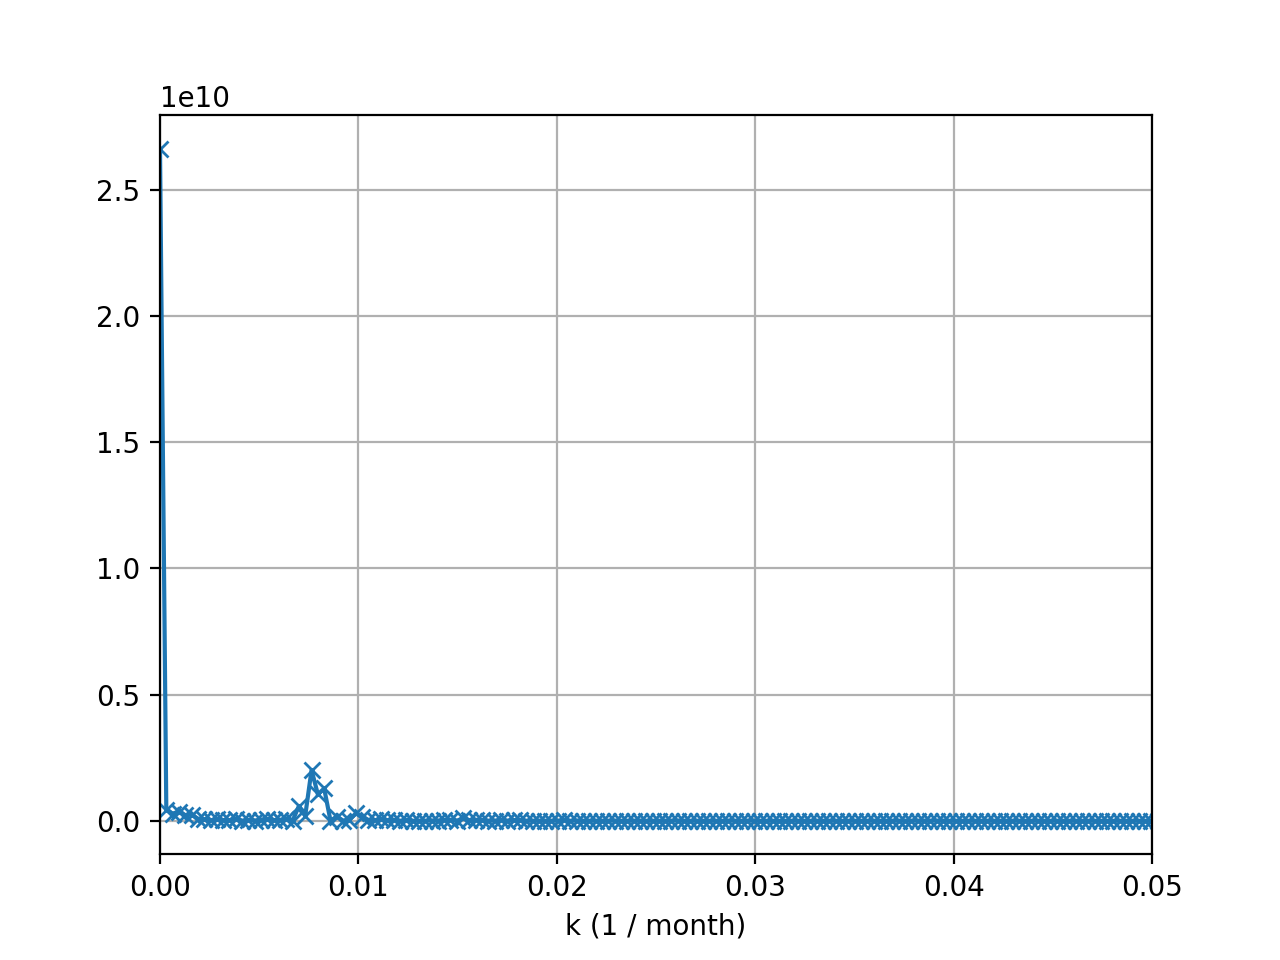

In [23]:
# 3.2 SOLUTION
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/x[-1]
ax.plot(k, np.abs(np.fft.rfft(y))**2, marker='x')
ax.set_xlim(0, .05)
ax.grid()
ax.set_xlabel("k (1 / month)")

3.3 What is the cause of the large peak at $k = 0$? Transform the sunspot data to help eliminate this effect, and plot the power spectrum of the new data. P
> 3.3. Solution: The $c_{0}$ coefficient is responsible for shifting the data from being centered at 0, to being centered at roughly 75. Thus 0-centering the data will remove this peak. The data can also be normalized between -1 and 1 to reduce the magnitude of the coefficients.

<IPython.core.display.Javascript object>


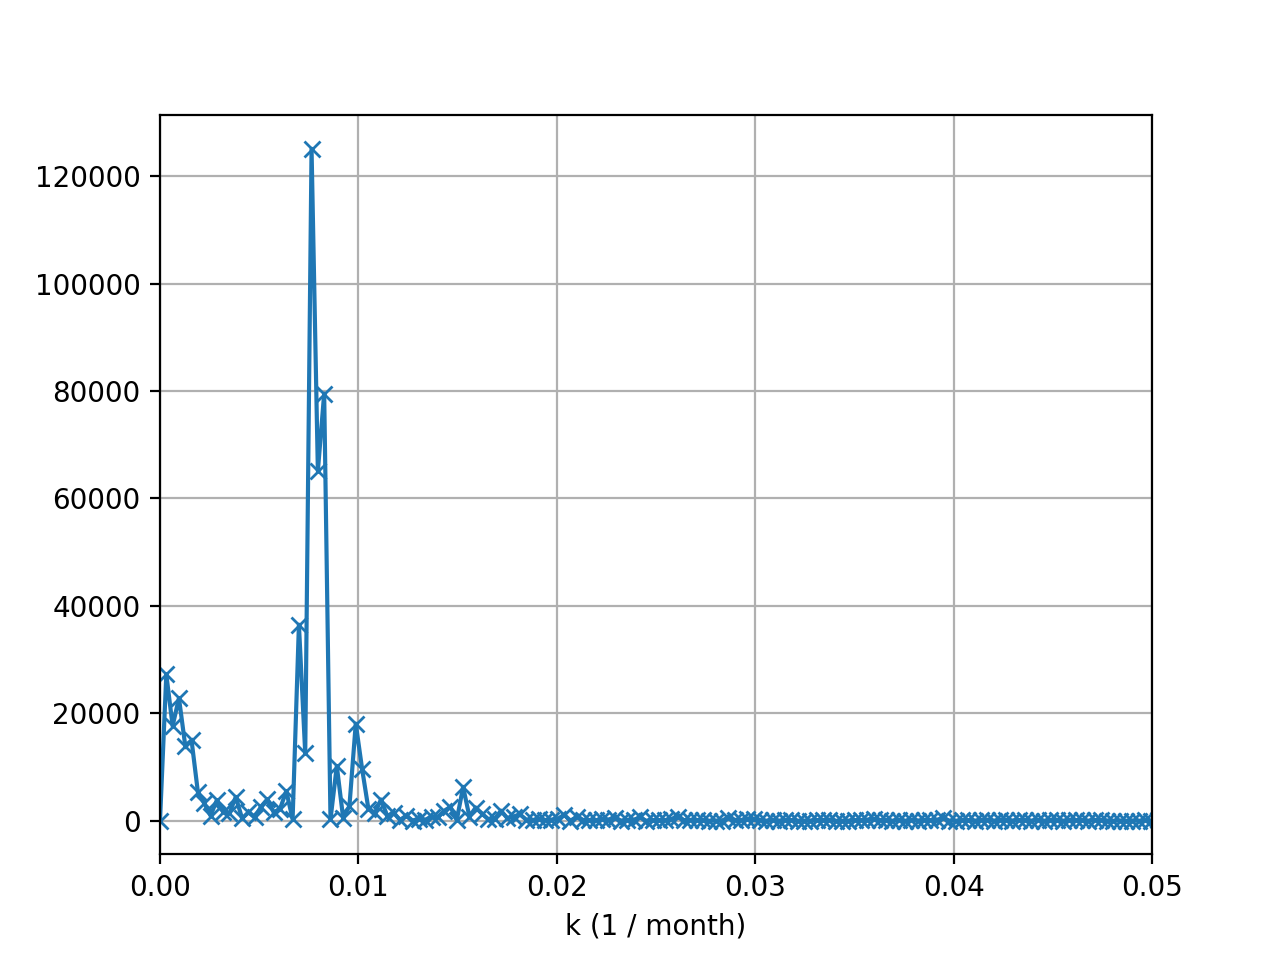

In [24]:
# 3.3 SOLUTION
fig,ax = plt.subplots()
k = np.arange(len(y)//2 + 1)/x[-1]
yp = 2*y/y.max()
yp -= yp.mean()
ax.plot(k, [np.abs(i)**2 for i in np.fft.rfft(yp)], marker='x')
ax.set_xlim(0, .05)
ax.grid()
ax.set_xlabel("k (1 / month)")

### Analyzing Audio Signals from Instruments

3.4 Read in the digital audio signal for a trumpet, from `data/trumpet.txt`, as an array of integers. This signal was recorded at a rate of 44.1 kHz, which is the defacto standard for audio sampling (as implemented by Sony).

Plot the signal on an x-axis labeled `"Time (sec)"` - be sure that the axis is scaled appropriately such that it reflects units of seconds. There is too much data to be plotted - plot every 100th datapoint. Then, play the audio using

```python
from IPython.display import Audio
Audio(data, rate=???)
```

<IPython.core.display.Javascript object>


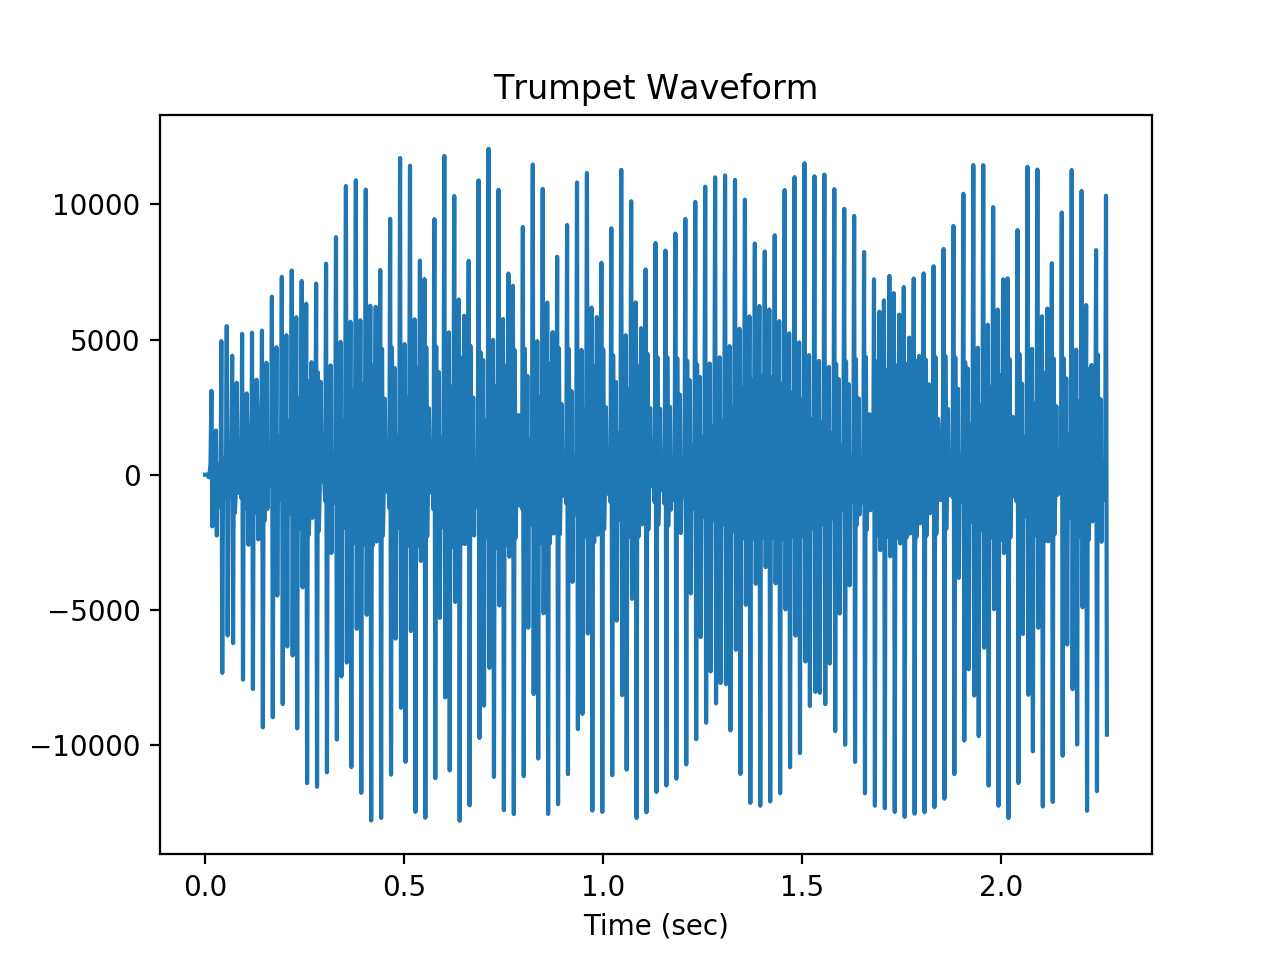

In [25]:
# 3.4 SOLUTION
with open("data/trumpet.txt", 'r') as R:
    data = np.asarray([int(i) for i in R])

fig, ax = plt.subplots()
t = np.arange(len(data)) / 44100
ax.plot(t[::100], data[::100])
ax.set_xlabel("Time (sec)")
ax.set_title("Trumpet Waveform")

In [28]:
from IPython.display import Audio
Audio(data, rate=44100)

3.5 Plot the frequency spectrum, $|c_{k}|$, for the first 10,000 $k$-values. Be sure to use a FFT for real-valued data - we are working with a lot of data. [What notes are being played](http://www.phy.mtu.edu/~suits/notefreqs.html)? Make sure that the $k$-axis of your spectrum is scaled to be in Hz.

<IPython.core.display.Javascript object>


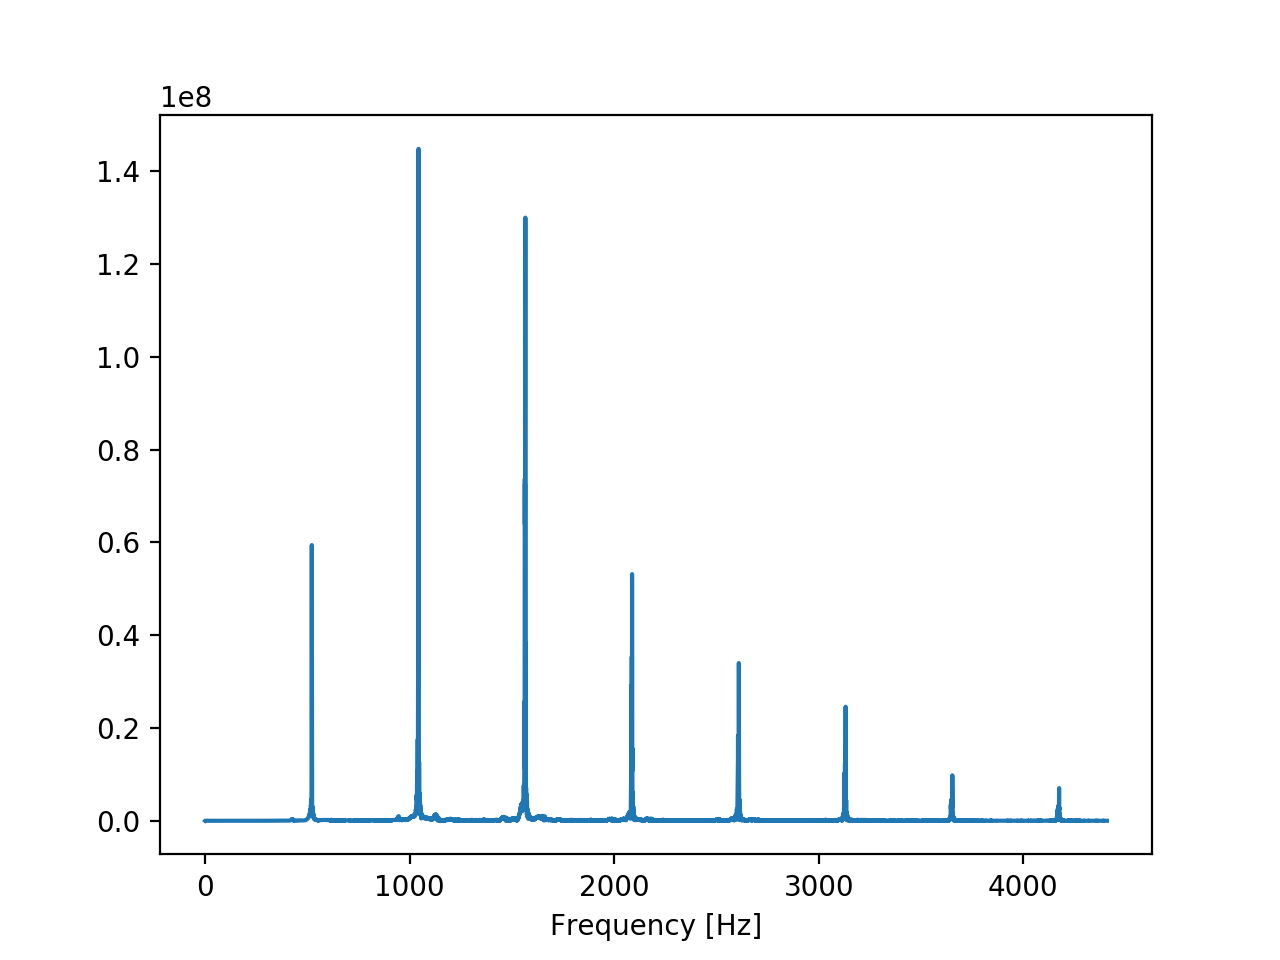

In [29]:
ck =  np.fft.rfft(data)
L = len(data) / 44100
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k[:10000], np.abs(ck[:10000]))
ax.set_xlabel("Frequency [Hz]")

3.6 Repeat this work for the piano audio signal

<IPython.core.display.Javascript object>


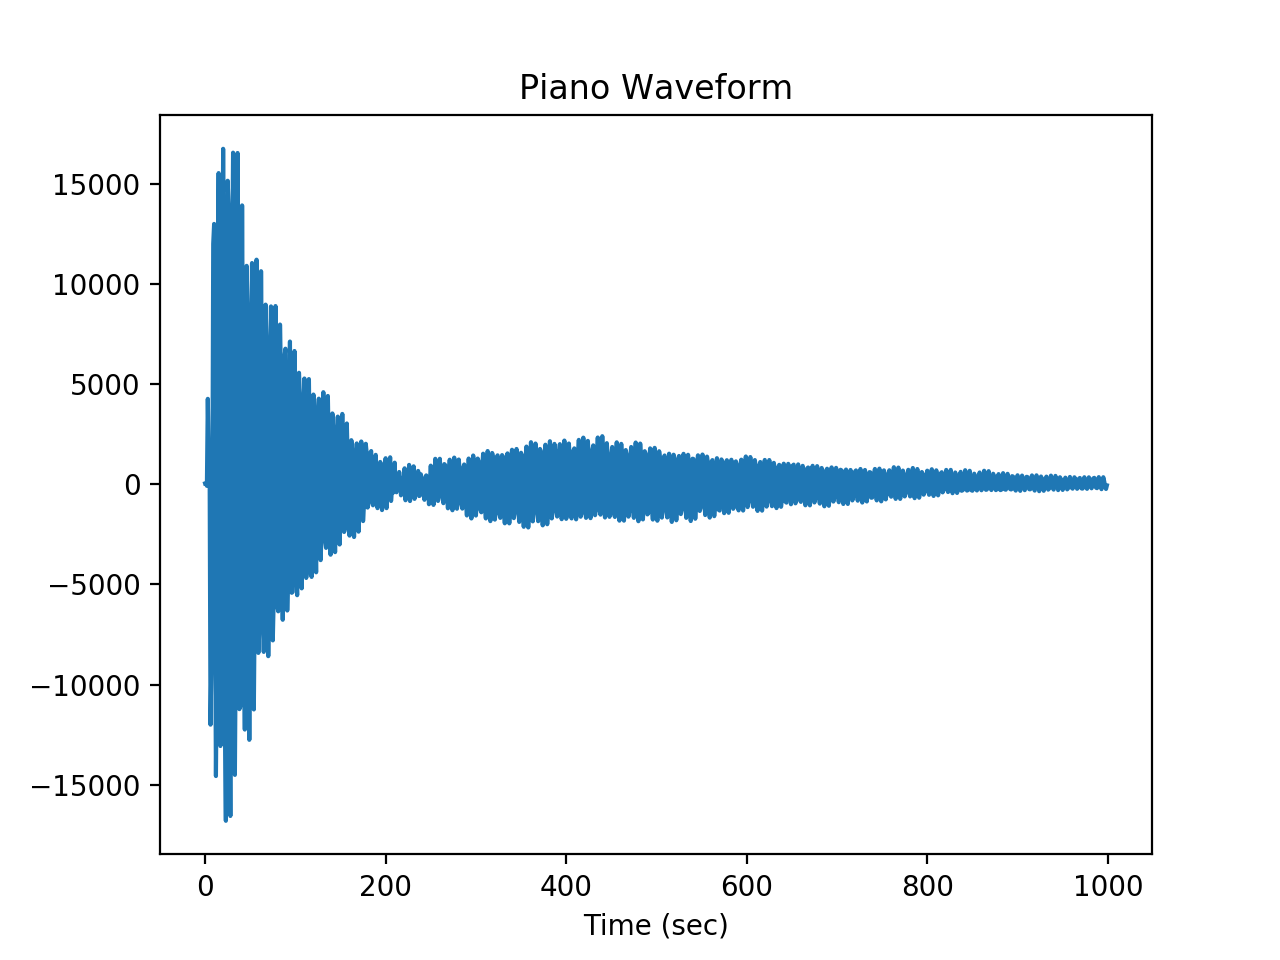

In [32]:
# 3.6 SOLUTION 
with open("data/piano.txt", 'r') as R:
    data = np.asarray([int(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data[::100])
ax.set_xlabel("Time (sec)")
ax.set_title("Piano Waveform")

In [36]:
from IPython.display import Audio
Audio(data, rate=44100)

<IPython.core.display.Javascript object>


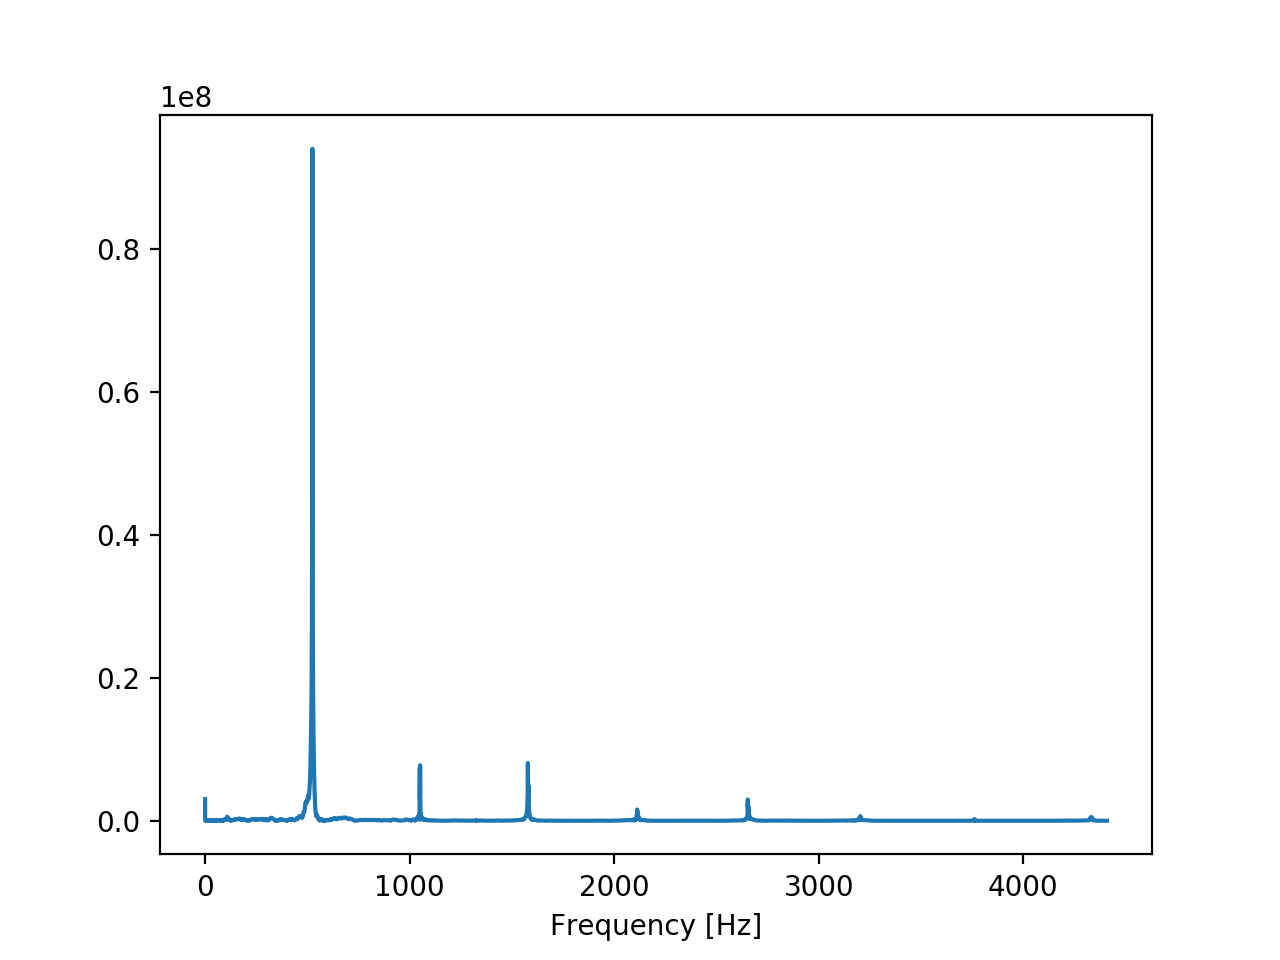

In [34]:
ck =  np.fft.rfft(data)
L = len(data) / 44100
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k[:10000], np.abs(ck[:10000]))
ax.set_xlabel("Frequency [Hz]")

## Smoothing Stock Market Data

3.7 Read in the stock market data from `data/dow.txt`. Each data point corresponds to the daily closing value of the Dow Jones Industrial Average (starting in late 2006 and ending in late 2010). Plot the data on labeled axes.

<IPython.core.display.Javascript object>


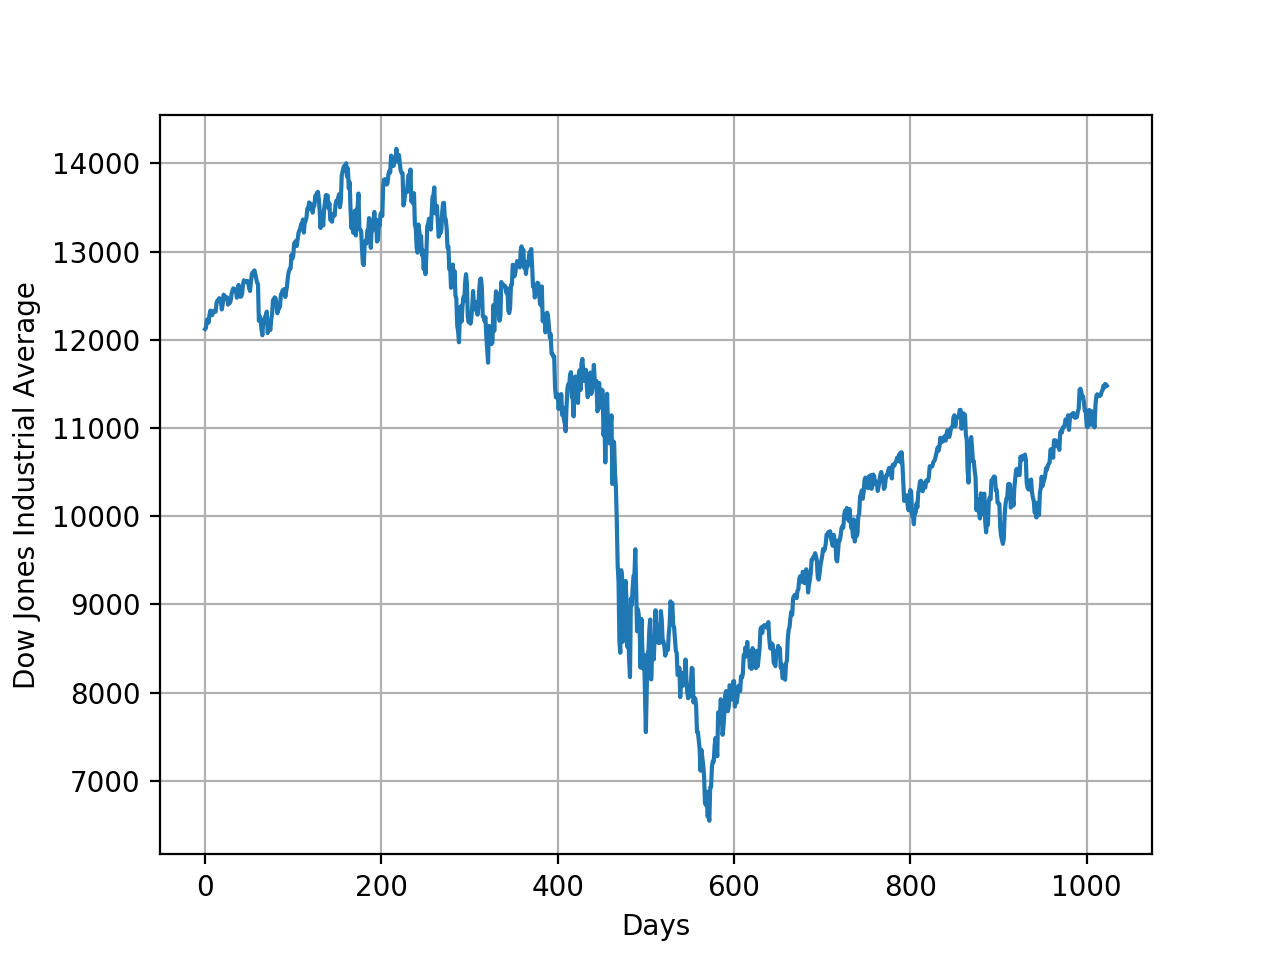

In [35]:
# 3.7 SOLUTION
with open("data/dow.txt", 'r') as R:
    data = np.asarray([float(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data)
ax.grid()
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")

3.8 Perform an FFT on this real-valued data, and plot $|c_{k}|$ on a log scale. The $k$-axis should be scaled to be in units of [1 / days].

<IPython.core.display.Javascript object>


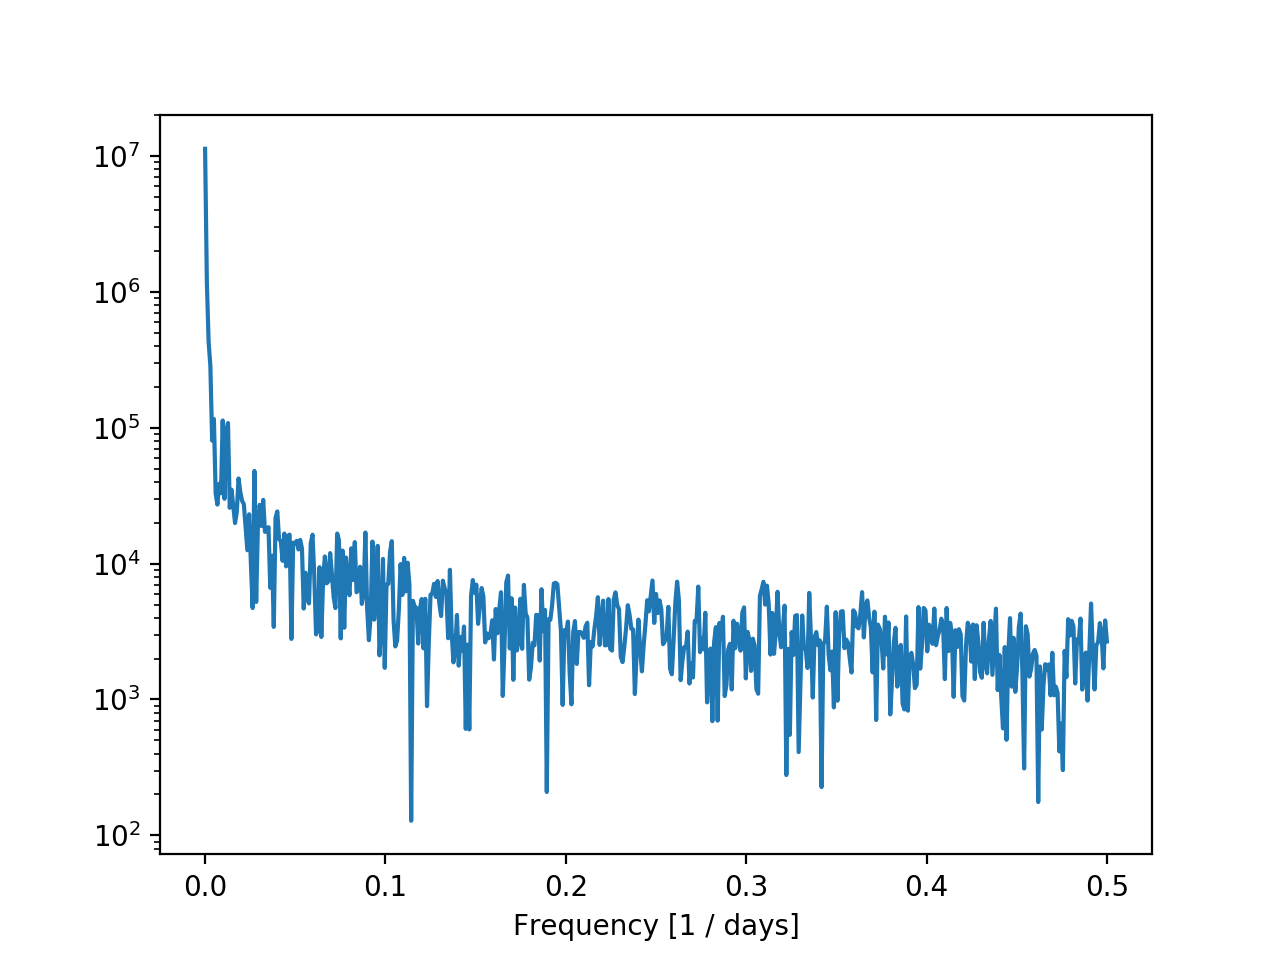

In [37]:
ck =  np.fft.rfft(data)
L = len(data)
k = np.arange(len(ck)) / L
fig, ax = plt.subplots()

ax.plot(k, np.abs(ck))
ax.set_xlabel("Frequency [1 / days]")
ax.set_yscale("log")

3.9 We want to smooth this stock market data. We can do this by "removing" the high-frequency coefficients of its Fourier spectrum. Try zeroing-out the top 90% high-frequency coefficients, and then perform an inverse FFT using these altered coefficients. Plot the "recovered" signal on top of a semi-transparent version of the original data (use the plot parameter `alpha=0.5`). Then repeat this, but with zeroing out the top 98% coefficients. In both of these cases, on what scale are the fluctuations being filtered out?
> 3.9 Solution. Filtering out the top 90% of the coefficients removes all of the day-to-day fluctuations, up to the fluctuations over ten-day spans. Filtering the top 98% coefficients extends this up to 50-day fluctuations.

<IPython.core.display.Javascript object>


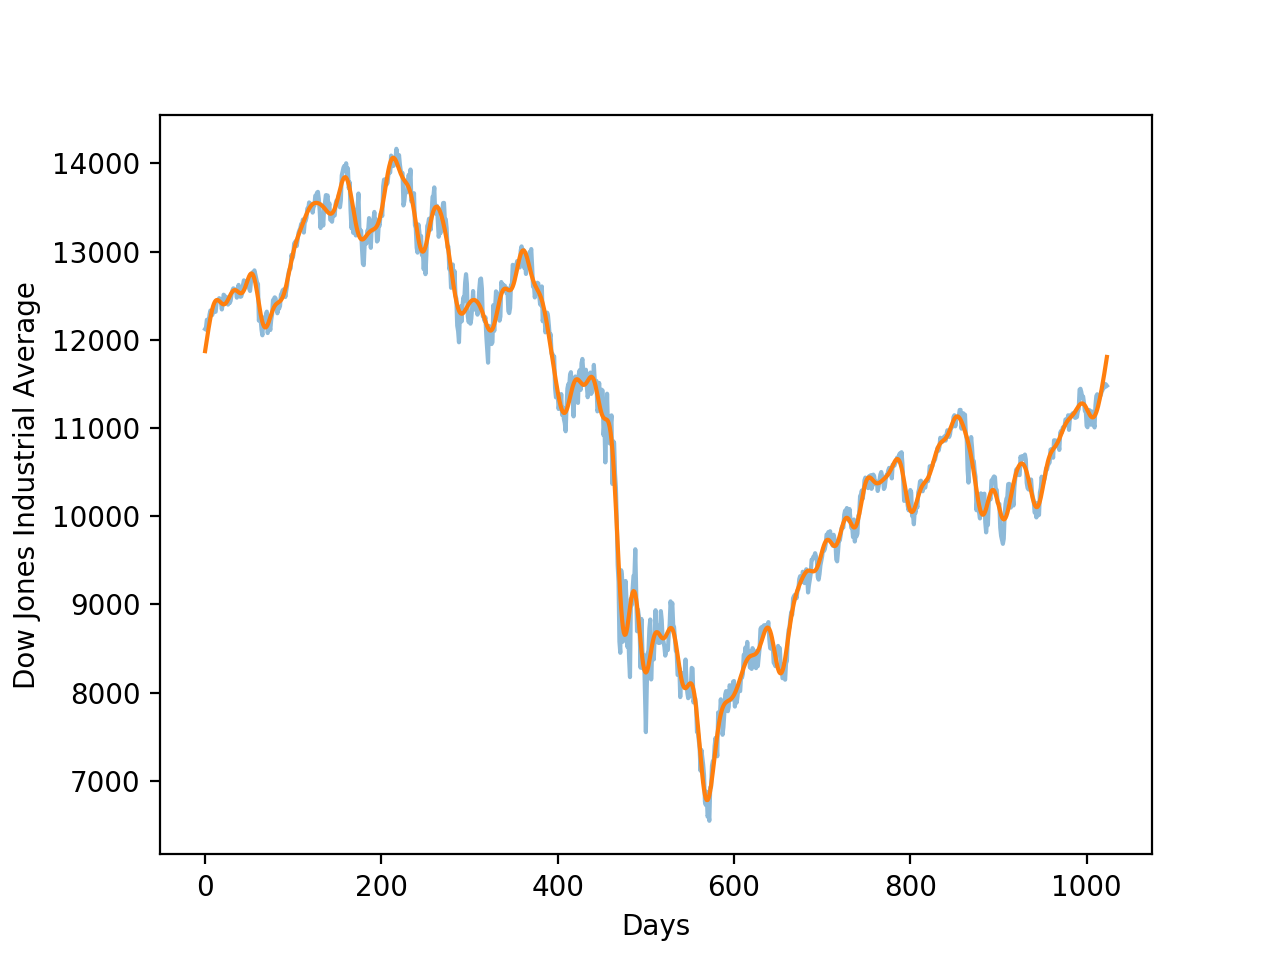

In [38]:
# 3.9 SOLUTION
ck =  np.fft.rfft(data)
ck[round(.1 * len(ck)):] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")

<IPython.core.display.Javascript object>


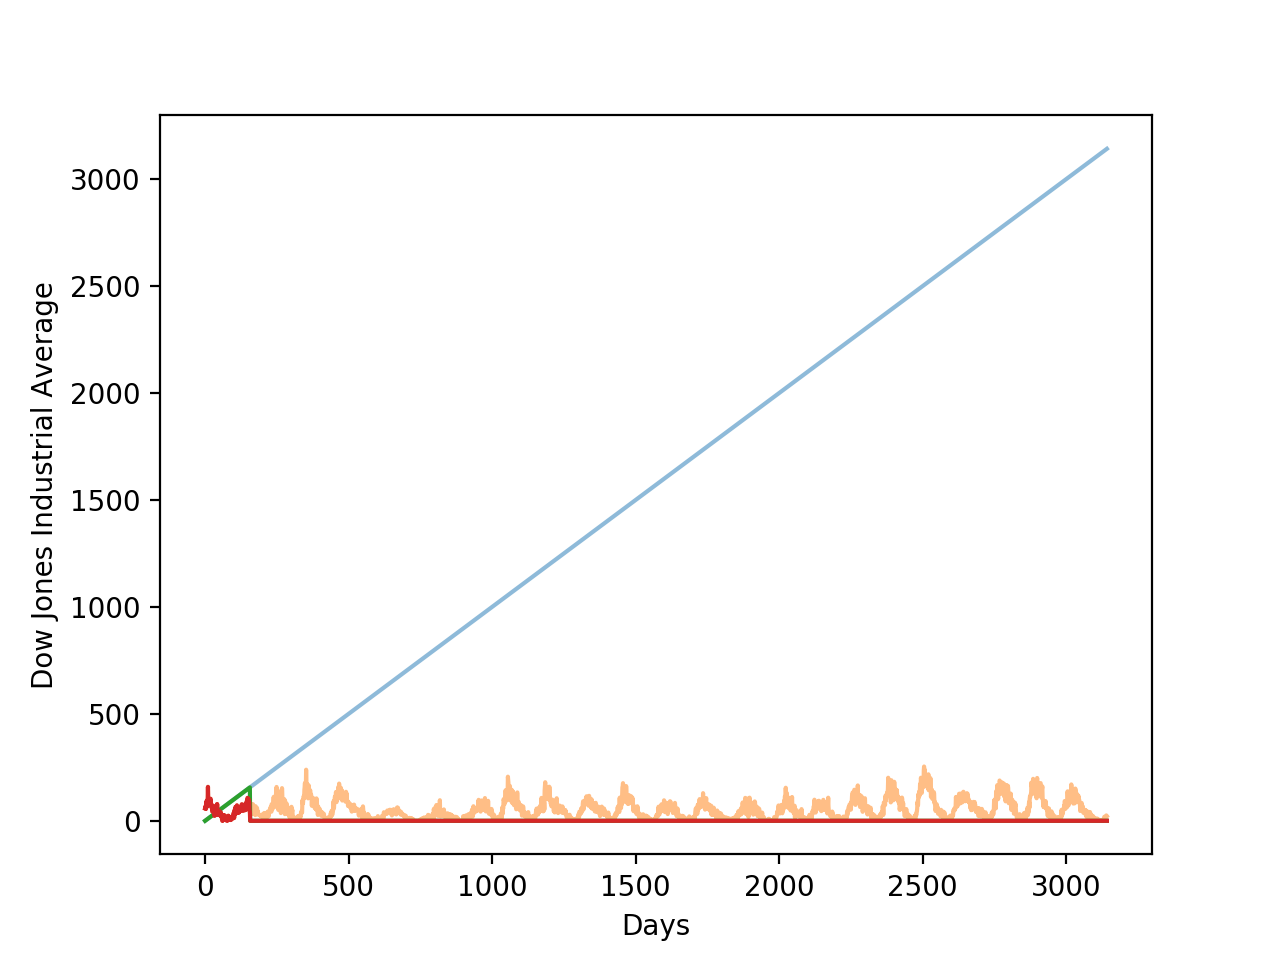

In [19]:
# 3.9 SOLUTION
ck =  np.fft.rfft(data)
ck[round(.02 * len(ck)):] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")

3.10 Now repeat this process but zero-out the bottom 10% **low-frequency** coefficients. What do you see? Why is there a huge down-shift in the recovered data? What would happen if you filtered out the bottom 10% low-frequency coefficients **except** for $c_{0}$? Try this.
> 3.10 Solution: Filtering out the bottom 10% shifts the data down so that its mean is 0, and it removes any fluctutions longer than a 10-day span. Retaining $c_{0}$ will restore the mean value of the data.

<IPython.core.display.Javascript object>


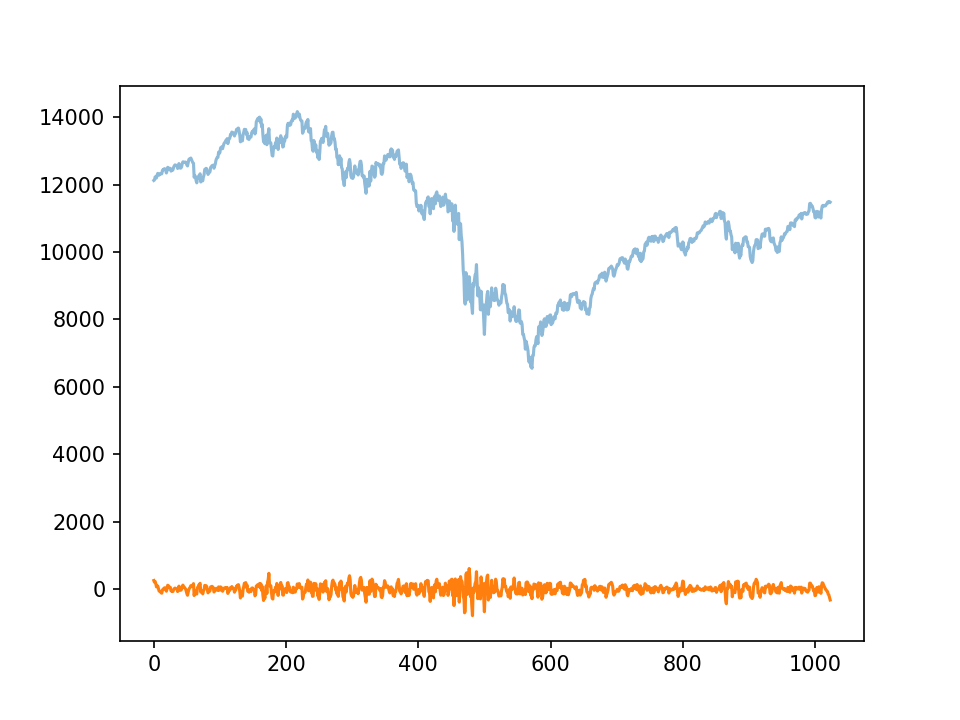

In [19]:
# 3.10 SOLUTION
ck =  np.fft.rfft(data)
ck[:round(.1 * len(ck))] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)

<IPython.core.display.Javascript object>


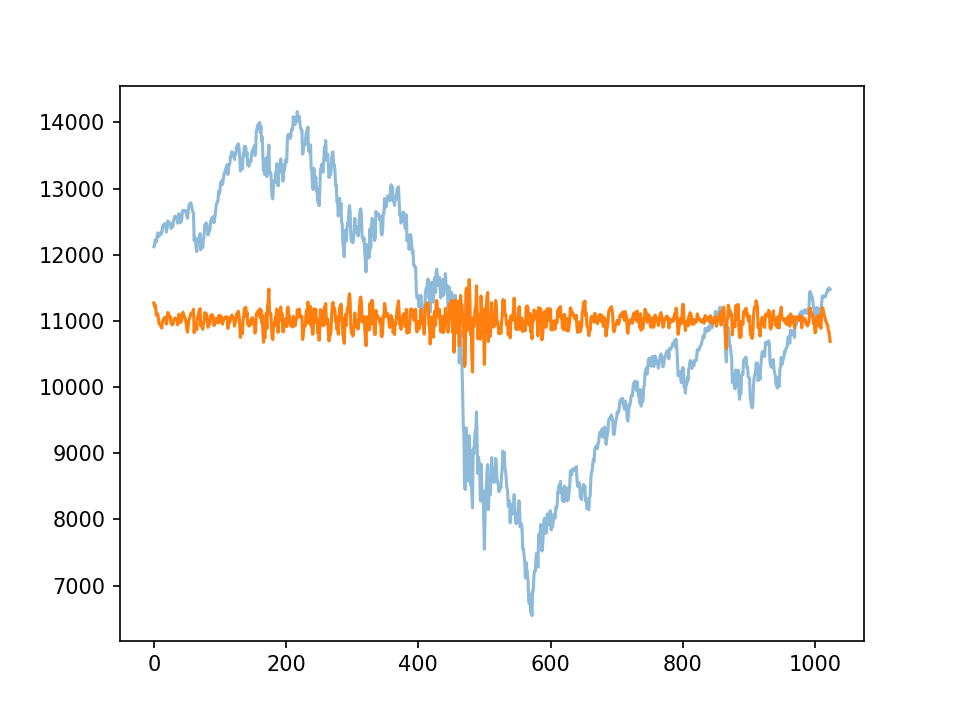

In [20]:
# 3.10 SOLUTION
ck =  np.fft.rfft(data)
ck[1:round(.1 * len(ck))] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5)
ax.plot(smooth)